In [1]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
# from tabulate import tabulate
import matplotlib.pyplot as plt
import geopandas as gpd

geo_italy = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson")
databases = [r'3d_printers.csv', r'modellazione_3d.csv', r'stampa_3d.csv', r'stampante_3d.csv', r'stampanti_3d_software.csv',]
# db1 = r"progetti.csv"  #inserire il path della set di dati

data = pd.read_csv(databases[0], sep=';', encoding='UTF-8')
data.head()

data1 = pd.read_csv(databases[1], sep=';', encoding='UTF-8')
data1.head()
data1.shape

data2 = pd.read_csv(databases[2], sep=';', encoding='UTF-8')
data2.head()

data3 = pd.read_csv(databases[3], sep=';', encoding='UTF-8')
data3.head()

data4 = pd.read_csv(databases[4], sep=';', encoding='UTF-8')
data4.head()

combined = pd.concat([data,data1], axis=0)
combined = pd.concat([combined,data2], axis=0)
combined = pd.concat([combined,data3], axis=0)
combined = pd.concat([combined,data4], axis=0)
# combined = pd.concat([combined,data5], axis=0)

combined.head()
combined.shape

combined = combined.drop_duplicates()
combined.shape

filter_theme = combined[(combined['OC_TEMA_SINTETICO'] == 'Occupazione e lavoro')]

filter_region = combined[(combined['DEN_REGIONE'] =='MARCHE')]

In [2]:
filter_theme.shape


(198, 199)

In [3]:
filter_region.shape

(14, 199)

In [4]:
macroarea = combined['OC_MACROAREA']  
regione = combined['DEN_REGIONE']
db_regions_area = pd.concat([regione,macroarea], axis = 1)
print(db_regions_area)

              DEN_REGIONE OC_MACROAREA
0                PIEMONTE  Centro-Nord
0                  UMBRIA  Centro-Nord
1   FRIULI-VENEZIA GIULIA  Centro-Nord
2   FRIULI-VENEZIA GIULIA  Centro-Nord
3   FRIULI-VENEZIA GIULIA  Centro-Nord
..                    ...          ...
59                 VENETO  Centro-Nord
60               CAMPANIA  Mezzogiorno
61  FRIULI-VENEZIA GIULIA  Centro-Nord
62  FRIULI-VENEZIA GIULIA  Centro-Nord
63  FRIULI-VENEZIA GIULIA  Centro-Nord

[949 rows x 2 columns]


In [5]:
sud = db_regions_area[(db_regions_area['OC_MACROAREA'] == 'Mezzogiorno')]
nord = db_regions_area[(db_regions_area['OC_MACROAREA'] == 'Centro-Nord')]
print(nord)

              DEN_REGIONE OC_MACROAREA
0                PIEMONTE  Centro-Nord
0                  UMBRIA  Centro-Nord
1   FRIULI-VENEZIA GIULIA  Centro-Nord
2   FRIULI-VENEZIA GIULIA  Centro-Nord
3   FRIULI-VENEZIA GIULIA  Centro-Nord
..                    ...          ...
58                 VENETO  Centro-Nord
59                 VENETO  Centro-Nord
61  FRIULI-VENEZIA GIULIA  Centro-Nord
62  FRIULI-VENEZIA GIULIA  Centro-Nord
63  FRIULI-VENEZIA GIULIA  Centro-Nord

[752 rows x 2 columns]


In [7]:
regions_nord = nord['DEN_REGIONE'].drop_duplicates()
regions_sud = sud['DEN_REGIONE'].drop_duplicates()


# regions.shape
# print(regions)
#print(es)
array_nord_region = []
array_sud_region = []
array_nord_num = []
array_sud_num = []


for x in regions_nord:
    filter_region = combined[(combined['DEN_REGIONE'] == x)]
    array_nord_num.append(filter_region.shape[0])
    array_nord_region.append(x)
for x in regions_sud:
    filter_region = combined[(combined['DEN_REGIONE'] == x)]
    array_sud_num.append(filter_region.shape[0])
    array_sud_region.append(x)
print(array_nord_region)
print(array_nord_num)
print(array_sud_region)
print(array_sud_num)
    


['PIEMONTE', 'UMBRIA', 'FRIULI-VENEZIA GIULIA', 'TOSCANA', 'EMILIA-ROMAGNA', 'TRENTINO-ALTO ADIGE', 'LAZIO', 'LIGURIA', 'MARCHE', 'VENETO', "VALLE D'AOSTA", 'LOMBARDIA', 'LOMBARDIA:::EMILIA-ROMAGNA:::TOSCANA']
[18, 28, 229, 143, 38, 4, 88, 42, 14, 89, 5, 51, 3]
['CAMPANIA', 'PUGLIA', 'SICILIA', 'ABRUZZO', 'SARDEGNA', 'BASILICATA', 'CALABRIA', 'MOLISE']
[62, 32, 29, 17, 24, 17, 15, 1]


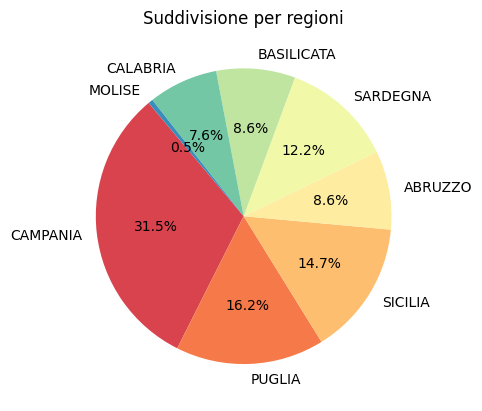

In [35]:
country_data = array_sud_region
medal_data = array_sud_num
palette = sns.color_palette("Spectral", len(country_data))
explode = (0, 0, 0, 0, 0, 0, 0, 0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=palette ,
autopct='%1.1f%%', shadow=False, startangle=130)
# plt.hist(array, bins = 21)ù
plt.title("Suddivisione per regioni")
plt.show()

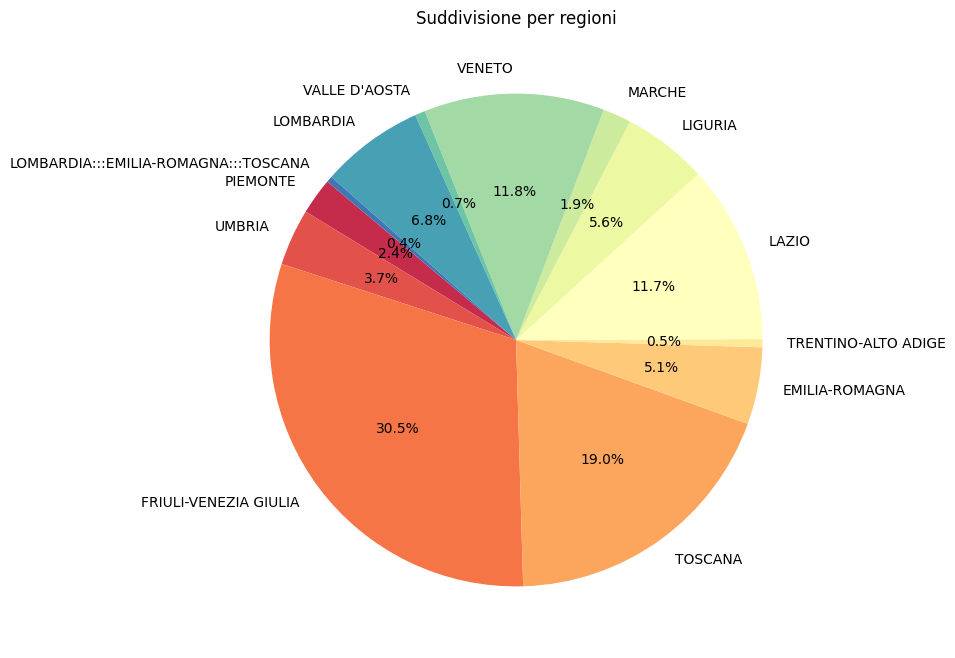

In [44]:
country_data = array_nord_region
medal_data = array_nord_num
plt.figure(figsize=(8,8))
palette = sns.color_palette("Spectral", len(country_data))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=palette,
autopct='%1.1f%%', shadow=False, startangle=140)
# plt.hist(array, bins = 21)
plt.title("Suddivisione per regioni")

# plt.plot(fig_size=(50,50))
plt.show()

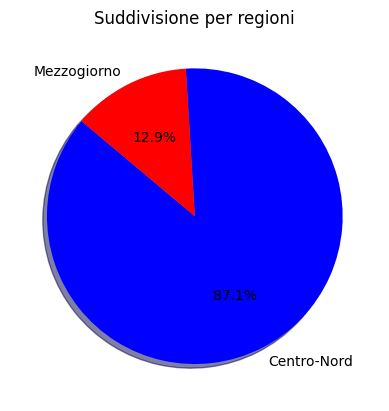

In [17]:
country_data = ['Centro-Nord', 'Mezzogiorno']
medal_data = [79.24, 11.76]
colors = ["#0000ff","#ff0000"]
explode = (0, 0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
# plt.hist(array, bins = 21)
plt.title("Suddivisione per regioni")
plt.show()

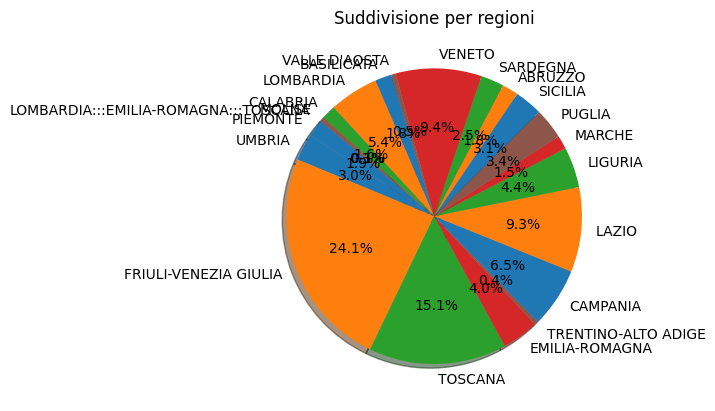

In [132]:
country_data = array2
medal_data = array
colors = ["#1f77b4","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
# plt.hist(array, bins = 21)ù
plt.title("Suddivisione per regioni")
plt.show()

In [148]:
filter_themes = combined['OC_TEMA_SINTETICO'].drop_duplicates()

print(filter_themes)

filter_theme = combined[(combined['OC_TEMA_SINTETICO'] == 'Reti e servizi digitali')].shape
print(filter_theme)

0            Ricerca e innovazione
0             Occupazione e lavoro
5      Competitività delle imprese
11         Istruzione e formazione
88                         Energia
155        Reti e servizi digitali
247    Inclusione sociale e salute
Name: OC_TEMA_SINTETICO, dtype: object
(108, 199)


c:\Python39\lib\site-packages\mapclassify\classifiers.py:255: UserWarning:

Not enough unique values in array to form 5 classes. Setting k to 4.

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_27372\1890644192.py:18: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




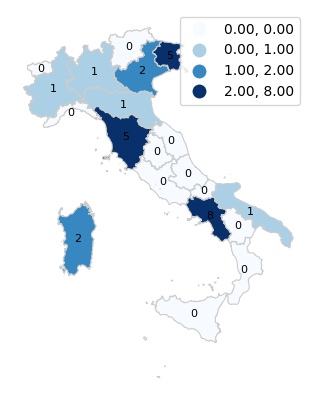

In [80]:
# dati=pd.read_csv('prova2.csv', sep=';')

dati = combined[['COD_REGIONE', 'OC_TEMA_SINTETICO']]  
# print(dati)
ricerca_sviluppo = dati[(dati['OC_TEMA_SINTETICO'] == 'Ricerca e innovazione')]
# print(ricerca_sviluppo)
# dati = combined['COD_REGIONE']
df = ricerca_sviluppo.groupby(['COD_REGIONE']).size().reset_index(name='counts')

data2 = pd.merge(left=geo_italy, right=df, left_on='reg_istat_code_num', right_on='COD_REGIONE', how='left')
data2['counts'] = data2['counts'].fillna(0)  # Replace missing values with 0

# Plotting the map
fig, ax = plt.subplots(figsize=(5, 5))
data2.plot(column='counts', scheme='quantiles', cmap="Blues", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding labels to the regions
for x, y, label in zip(data2.geometry.centroid.x, data2.geometry.centroid.y, data2['counts']):
    ax.text(x, y, int(label), fontsize=8, ha='center', va='center', color='black')

ax.set_axis_off()
plt.show()


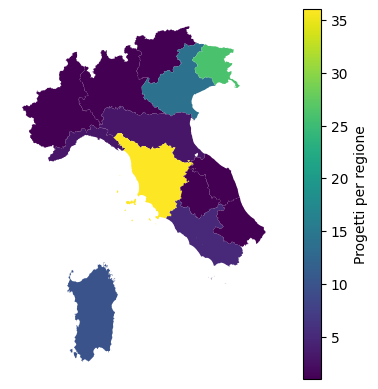

In [32]:
occupazione_lavoro = dati[(dati['OC_TEMA_SINTETICO'] == 'Occupazione e lavoro')]
df = occupazione_lavoro.groupby(['COD_REGIONE']).size().reset_index(name='counts')

data2 = pd.merge(left=geo_italy, right=df,left_on='reg_istat_code_num', right_on='COD_REGIONE')

ax=data2.plot(column="counts",
    legend=True,
    legend_kwds={'label': "Progetti per regione",
                        #'orientation': "horizontal"
                        })
ax.set_axis_off()